In [3]:
import pandas as pd
import csv

content = []
fieldnames = ['reception_time', 'ip', 'controller',
             'order', 'label', 'lsg', 'sentence', 'answer',
             'correct', 'time']

In [5]:
with open('results.csv', 'r') as f:
    rdr = csv.DictReader(filter(lambda row: row[0]!='#', f), fieldnames=fieldnames)
    for line in rdr:
        if line['label'].startswith('id'):
            content.append(line)

In [6]:
# 1. Results reception time.
# 2. MD5 hash of participant's IP address.
# 3. Controller name.
# 4. Order number of item.
# 5. Inner element number.
# 6. Label.
# 7. Latin Square Group.
# 8. Sentence (or sentence MD5).
# 8. Question (NULL if none)..
# 9. Answer.
# 10. Whether or not answer was correct (NULL if N/A).
# 11. Time taken to answer..

In [7]:
df = pd.DataFrame.from_dict(content)
df

,reception_time,ip,controller,order,label,lsg,sentence,answer,correct,time
0,1636880892,f22bc56aad1bc122b31322a6a09ec2f6,12,0,id.mesh.pass.a,2,Хорошее воспитание не мешало грехам водиться з...,None,None,None
1,1636880892,f22bc56aad1bc122b31322a6a09ec2f6,12,0,id.mesh.pass.a,2,NULL,4,NULL,411
2,1636880892,f22bc56aad1bc122b31322a6a09ec2f6,18,0,id.pomo.act.a,4,Следователи были в полном замешательстве%2C но...,None,None,None
3,1636880892,f22bc56aad1bc122b31322a6a09ec2f6,18,0,id.pomo.act.a,4,NULL,4,NULL,408
4,1636880892,f22bc56aad1bc122b31322a6a09ec2f6,7,0,id.zast.act.b,1,Напряженное молчание заставляло атмосферу сгущ...,None,None,None
...,...,...,...,...,...,...,...,...,...,...
1317,1637320461,50e8489de504ee406f46efe0ba6015e9,21,0,id.pomo.act.b,7,NULL,7,NULL,9555
1318,1637320461,50e8489de504ee406f46efe0ba6015e9,10,0,id.zast.pass.a,2,Приход в администрацию нового руководства заст...,None,None,None
1319,1637320461,50e8489de504ee406f46efe0ba6015e9,10,0,id.zast.pass.a,2,NULL,7,NULL,5174
1320,1637320461,50e8489de504ee406f46efe0ba6015e9,17,0,id.pozv.act.b,5,В команде проекта собрались отличные компетент...,None,None,None


In [8]:
label2sent = {ele['label']:ele['sentence'] for ele in content[::2]}

label2sent

{'id.mesh.pass.a': 'Хорошее воспитание не мешало грехам водиться за Аркашей. ',
 'id.pomo.act.a': 'Следователи были в полном замешательстве%2C но рассказ очевидца помог всему встать на свои места. ',
 'id.zast.act.b': 'Напряженное молчание заставляло атмосферу сгущаться сильнее и сильнее. ',
 'id.pozv.pass.b': 'Школьная директриса Лариса Эдуардовна была сторонницей индивидуального подхода к ученикам и не позволяла ярлыкам вешаться без разбора. ',
 'id.mesh.pass.b': 'Родительский контроль должен мешать головам детей забиваться чушью%2C которую они могут увидеть в интернете.',
 'id.zast.pass.a': 'Приход в администрацию нового руководства заставил декорации смениться.',
 'id.pomo.act.b': 'Алёна была в ярости%2C когда узнала%2C где муж побывал той ночью%2C но искренние извинения и пышный букет пионов помогли гневу смениться на милость.',
 'id.pozv.act.a': 'Бесконечные промедления никак не позволяли делу сдвинуться с мёртвой точки.',
 'id.zast.pass.b': 'Хватит учить Пашу писать стихи – заст

In [154]:
import numpy as np

df["answer"] = pd.to_numeric(df["answer"], downcast="float")
table = pd.pivot_table(df, values='answer', columns=['label'], aggfunc=np.nanmean)
table

label,id.mesh.act.a,id.mesh.act.b,id.mesh.pass.a,id.mesh.pass.b,id.pomo.act.a,id.pomo.act.b,id.pomo.pass.a,id.pomo.pass.b,id.pozv.act.a,id.pozv.act.b,id.pozv.pass.a,id.pozv.pass.b,id.zast.act.a,id.zast.act.b,id.zast.pass.a,id.zast.pass.b
answer,4.404762,5.465117,3.636364,4.390244,5.682927,5.772727,3.954545,4.5,6.170732,5.659091,5.209302,4.04878,5.3,5.022727,4.636364,3.463415


NameError: name 'table' is not defined

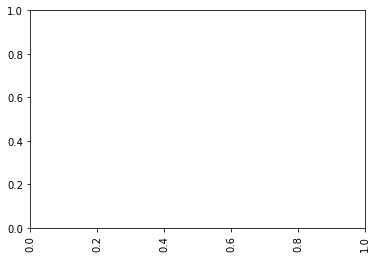

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

colors = ['grey', 'pink', 'brown', 'purple']
plt.xticks(rotation=90)

words = ['mesh', 'pomo', 'pozv', 'zast']
for key in table.to_dict().keys():
    plt.bar(key, round(table.to_dict()[key]['answer'], 3), color=colors[words.index(key.split('.')[1])])

plt.title('Стимулы')
plt.ylabel('Оценка')
plt.xlabel('Пример')
plt.show()

for key in table.to_dict().keys():
    print(f'{key}\t\t{label2sent[key]}')

In [169]:
df['ip'].nunique()

80

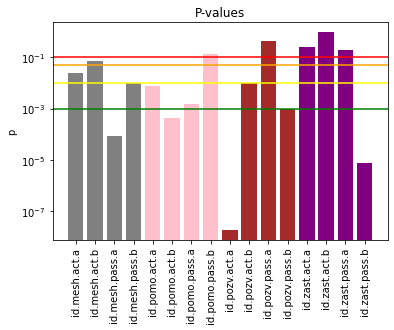

id.mesh.act.a		0.02465
id.mesh.act.b		0.06962
id.mesh.pass.a		9e-05
id.mesh.pass.b		0.01016
id.pomo.act.a		0.00763
id.pomo.act.b		0.00043
id.pomo.pass.a		0.00151
id.pomo.pass.b		0.12884
id.pozv.act.a		0.0
id.pozv.act.b		0.01023
id.pozv.pass.a		0.41577
id.pozv.pass.b		0.00092
id.zast.act.a		0.26203
id.zast.act.b		0.93625
id.zast.pass.a		0.19775
id.zast.pass.b		1e-05


In [170]:
from scipy import stats

X = list(df['label'].unique())
Y = []
for l in [list(df.loc[df['label'] == label]['answer'])[1::2] for label in df['label'].unique()]:
    Y.append(stats.ttest_1samp(l,5.0)[1])
    
pvalues = dict(sorted(zip(X, Y)))
X = list(pvalues.keys())
Y = list(pvalues.values())

plt.xticks(rotation=90)
plt.yscale('log')

plt.axhline(y=0.001, color='green')
plt.axhline(y=0.01, color='yellow')
plt.axhline(y=0.05, color='orange')
plt.axhline(y=0.1, color='red')

#plt.bar(X, Y, color='grey')
for key in pvalues:
    plt.bar(key, pvalues[key], color=colors[words.index(key.split('.')[1])])

plt.title('P-values')
plt.ylabel('p')
plt.xlabel('')
plt.show()

for i in range(len(Y)):
    print(f'{X[i]}\t\t{round(Y[i], 5)}')

In [171]:
ttest = {}

for label in pvalues:
    if pvalues[label] <= 10**(-3):
        ttest[label] = 'GOOD'
    elif 10**(-3) <= pvalues[label] <= 10**(-2):
        ttest[label] = 'moderate'
    elif 10**(-2) <= pvalues[label] <= 10**(-2)*5:
        ttest[label] = 'weak'
    elif 10**(-2)*5 <= pvalues[label] <= 10**(-1):
        ttest[label] = 'very weak'
    else:
        ttest[label] = 'no evidence :('
    

for i in range(len(X)):
    print(f'{X[i]}\t{round(float(table[X[i]]), 2)}\t{ttest[X[i]]}')
    if i%4 == 3:
        print('\n')
        
label2sent

id.mesh.act.a	4.4	weak
id.mesh.act.b	5.47	very weak
id.mesh.pass.a	3.64	GOOD
id.mesh.pass.b	4.39	weak


id.pomo.act.a	5.68	moderate
id.pomo.act.b	5.77	GOOD
id.pomo.pass.a	3.95	moderate
id.pomo.pass.b	4.5	no evidence :(


id.pozv.act.a	6.17	GOOD
id.pozv.act.b	5.66	weak
id.pozv.pass.a	5.21	no evidence :(
id.pozv.pass.b	4.05	GOOD


id.zast.act.a	5.3	no evidence :(
id.zast.act.b	5.02	no evidence :(
id.zast.pass.a	4.64	no evidence :(
id.zast.pass.b	3.46	GOOD




{'id.mesh.act.a': 'Мой день рождения проходил отлично%2C однако праздник не мешал кошкам скрести на душе. ',
 'id.pomo.pass.b': 'Дружелюбный настрой Костиных новых знакомых и бутылка хорошего полусухого вина помогли льду растопиться быстро и легко.',
 'id.mesh.pass.b': 'Родительский контроль должен мешать головам детей забиваться чушью%2C которую они могут увидеть в интернете.',
 'id.pozv.pass.b': 'Школьная директриса Лариса Эдуардовна была сторонницей индивидуального подхода к ученикам и не позволяла ярлыкам вешаться без разбора. ',
 'id.pozv.act.a': 'Бесконечные промедления никак не позволяли делу сдвинуться с мёртвой точки.',
 'id.pomo.act.a': 'Следователи были в полном замешательстве%2C но рассказ очевидца помог всему встать на свои места. ',
 'id.zast.act.a': 'Очередной провал заставил почву уйти из-под ног молодого предпринимателя – выхода из ситуации не было никакого. ',
 'id.zast.pass.b': 'Хватит учить Пашу писать стихи – заставляешь бумагу мараться почем зря.',
 'id.mesh.act.b

In [4]:
fillers = []

In [6]:
with open('results 13.41.50.csv', 'r') as f:
    rdr = csv.DictReader(filter(lambda row: row[0]!='#', f), fieldnames=fieldnames)
    for line in rdr:
        if line['label'].startswith('F'):
            fillers.append(line)

In [7]:
ff = pd.DataFrame.from_dict(fillers)
ff["answer"] = pd.to_numeric(ff["answer"], downcast="float")

In [8]:
from scipy import stats
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

pvalues = []
for l in [list(ff.loc[ff['label'] == label]['answer'])[1::2] for label in ff['label'].unique()]:
    pvalues.append((stats.ttest_1samp(l,5.0)[1]))
    
Y = sorted(pvalues)
X = list(ff['label'].unique())
plt.xticks(rotation=90)
plt.yscale('log')

plt.axhline(y=0.001, color='green')
plt.axhline(y=0.01, color='yellow')
plt.axhline(y=0.05, color='orange')
plt.axhline(y=0.1, color='red')

plt.bar(X, Y, color='grey')
plt.title('')
plt.ylabel('')
plt.xlabel('')
plt.show()

for i in range(len(Y)):
    print(f'{X[i]}\t\t{round(Y[i], 5)}')

NameError: name 'plt' is not defined

<Figure size 640x480 with 0 Axes>

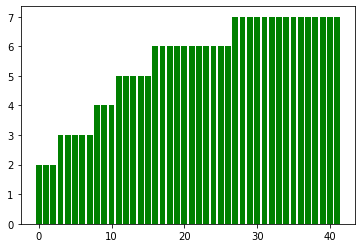

In [18]:
Y = sorted(list(df.loc[df['label'] == 'id.mesh.act.b']['answer'])[1::2])
X = [i for i in range(len(Y))]

plt.bar(X, Y, color='green')
plt.title('')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [175]:
df

,reception_time,ip,controller,order,label,lsg,sentence,answer,correct,time
0,1637172021,9fec503f35981a6ebc1af94b25381660,12,0,id.mesh.act.a,3,Мой день рождения проходил отлично%2C однако п...,None,None,None
1,1637172021,9fec503f35981a6ebc1af94b25381660,12,0,id.mesh.act.a,3,NULL,2,NULL,4021
2,1637172021,9fec503f35981a6ebc1af94b25381660,23,0,id.pomo.pass.b,8,Дружелюбный настрой Костиных новых знакомых и ...,None,None,None
3,1637172021,9fec503f35981a6ebc1af94b25381660,23,0,id.pomo.pass.b,8,NULL,7,NULL,6975
4,1637172021,9fec503f35981a6ebc1af94b25381660,15,0,id.mesh.pass.b,4,Родительский контроль должен мешать головам де...,None,None,None
...,...,...,...,...,...,...,...,...,...,...
1349,1637172021,9fec503f35981a6ebc1af94b25381660,20,0,id.pomo.act.a,7,NULL,7,NULL,4831
1350,1637172021,9fec503f35981a6ebc1af94b25381660,8,0,id.zast.act.a,1,Очередной провал заставил почву уйти из-под но...,None,None,None
1351,1637172021,9fec503f35981a6ebc1af94b25381660,8,0,id.zast.act.a,1,NULL,7,NULL,4488
1352,1637172021,9fec503f35981a6ebc1af94b25381660,11,0,id.zast.pass.b,2,Хватит учить Пашу писать стихи – заставляешь б...,None,None,None


In [9]:
df = pd.DataFrame.from_dict(content)

norm = []
keys = ['reception_time', 'ip', 'label', 'sentence', 'answer', 'time']

In [10]:
for line in list(content)[::2]:
    dic = {}
    for key in keys:
        if line[key] and line[key] != 'NULL':
            dic[key] = line[key]
    norm.append(dic)
    
print(len(norm))
        
for line in list(content)[1::2]:
    for key in keys:
        if line[key] and line[key] != 'NULL':
            norm[list(content).index(line)//2][key] = line[key]
            
print(len(norm))

661
661


In [11]:
with open('results_normal.csv', 'w') as f:
    writer = csv.DictWriter(f, fieldnames=keys)
    writer.writeheader()
    for line in norm:
        writer.writerow(line)

In [11]:
fillers

[{'reception_time': '1636880892',
  'ip': 'f22bc56aad1bc122b31322a6a09ec2f6',
  'controller': '38',
  'order': '0',
  'label': 'Fu-1F.01',
  'lsg': 'NULL',
  'sentence': 'Анечка совсем не хотела есть суп%2C потому что терпеть не могло вареный луком. ',
  'answer': None,
  'correct': None,
  'time': None},
 {'reception_time': '1636880892',
  'ip': 'f22bc56aad1bc122b31322a6a09ec2f6',
  'controller': '38',
  'order': '0',
  'label': 'Fu-1F.01',
  'lsg': 'NULL',
  'sentence': 'NULL',
  'answer': '4',
  'correct': 'NULL',
  'time': '2672'},
 {'reception_time': '1636880892',
  'ip': 'f22bc56aad1bc122b31322a6a09ec2f6',
  'controller': '22',
  'order': '0',
  'label': 'Fg-1F.01',
  'lsg': 'NULL',
  'sentence': 'Если бы не дождь с градом%2C я бы пошла сегодня гулять в Петровский парк. ',
  'answer': None,
  'correct': None,
  'time': None},
 {'reception_time': '1636880892',
  'ip': 'f22bc56aad1bc122b31322a6a09ec2f6',
  'controller': '22',
  'order': '0',
  'label': 'Fg-1F.01',
  'lsg': 'NULL',


In [12]:
norm = []
keys = ['reception_time', 'ip', 'label', 'sentence', 'answer', 'time']

for line in list(fillers)[::2]:
    dic = {}
    for key in keys:
        if line[key] and line[key] != 'NULL':
            dic[key] = line[key]
    norm.append(dic)
    
print(len(norm))
        
for line in list(fillers)[1::2]:
    for key in keys:
        if line[key] and line[key] != 'NULL':
            norm[list(fillers).index(line)//2][key] = line[key]
            
print(len(norm))

1399
1399


In [13]:
with open('fillers_normal.csv', 'w') as f:
    writer = csv.DictWriter(f, fieldnames=keys)
    writer.writeheader()
    for line in norm:
        writer.writerow(line)

In [ ]:
fig.set_axis_labels('', '')
fig.savefig('')